<br>

<div style ="width: 100%;">
<table style ="width: 100%;background-color:float:center;">
<tr>

</tr>
    
<tr>
        
<td>
<div style="font-size: 21px;Margin-left:-10px;">
<b>Lógica Computacional TP1<b>
</div>
    <br>
    <br>
<div style="font-size: 16px;">
    
Realizado por:

Miguel Gonçalves a90416
 
João Nogueira a87973
</div>
</td>
<td >
<div style="display:inline-block; float:right;Margin-right:0px;Margin-top:20px;">
<img src="https://www.ecum.uminho.pt/SiteAssets/ECUM-PT.png" width="260" height="120">
<div>
</td>
</tr>
</table>
</div>


2. Considere-se um circuito booleano $\,\mathcal{C}\,$ com $\,n\,$ “wires” de “input” e um único “wire” de output.
    - O circuito é descrito num bi-grafo com uma classe de nodos representando “gates” e a segunda classe representando “wires” . 
    - Cada nodo contém um campo val cujo conteúdo descreve a semântica desse nodo; para os “wires” o campo val  contém uma variável SCIP; para as “gates” o campo val  contém uma marca bo conjunto and, or,  xor e not,   que indica o tipo de “gate”. 
    - Com exceção de not , que é um operador unário, todas as restantes “gates” têm um número arbitrário de “inputs” e um único “output”.
    - No grafo os arcos com origem numa determinada “gate”  têm destino nos “wires” que são “input” dessa “gate”. Cada “wire” que não é “input” é origem de um único arco que tem como destino a “gate” do qual esse “wire” é “output”.
    - A semântica das várias “gates” é expressa em relações na Aritmética Linear Inteira, tal como está descrita em +Capítulo 2: Programação com Restrições (#LIA)
    
    
1. Escreva um programa que, a partir do número n de “inputs”  e de um parâmetro positivo $\,\gamma\ll 1\,$ como argumentos,  gere aleatoriamente circuitos com “gates” or, and e not  em que o número de and's é  $\,\gamma\ast\,$ (número total de nodos).
    2. Escreva um programa Python que leia um circuito arbitrário descrito pelo bi-grafo anterior e formule as restrições (em Programação Inteira) que descrevem as várias “gates” do circuito.
    3. Usando os dois programas anteriores e o sistema SCIP, 
 
        1. Escreva um programa que determine um vetor de “inputs”  $\,x\in\{0,1\}^n\,$ aceite pelo circuito (i.e. o respetivo output é $1$).
        2. Determine o vetor $x'\neq x$ , também aceite pelo circuito, que está mais próximo de $ x $. 


## Restrições
1. And(x1,...,xn): 

- $\sum_i x_i < y + n$  

- $x_i\ge y$ 


2. Or(x1,...,xn): 


- $y\le \sum_i x_i$ 

- $x_i \le y$

3. Not(x): 

- $x + y = 1$

In [155]:
from pyscipopt import Model, quicksum
import math 
import random
import networkx as nx
from networkx import bipartite
import matplotlib.pyplot as plt


def addOR(model,outvar,*invars):
    for x in invars:
        model.addCons(x <= outvar)
    model.addCons(quicksum(invars) >= outvar)
    
def addAND(model,outvar,*invars):
    n = len(invars)
    for x in invars:
        model.addCons(x >= outvar)
        
    model.addCons(quicksum(invars) <= outvar + n - 1)
def addNOT(model,outvar,invar):
    model.addCons(outvar + invar == 1)
    

In [299]:
def adicionaIn (G,ant,i,N,M,d):
    
    if N==1:
        randomNumber = 0
        G.add_edge(0,i)
        d[i].append(0)
    
    else:
        randomNumber = random.randint(0, N+M-2)
        while randomNumber == ant:
            randomNumber = random.randint(0, N+M-2)
        G.add_edge(randomNumber,i)
        d[i].append(randomNumber)
    
    return G,randomNumber

def adicionaOut (G,l,i,N,M,d):
    randomNumber = random.randint(N, N+M-1)    
    while randomNumber in l:
        randomNumber = random.randint(N,N+M-1)
    l.append(randomNumber)
    G.add_edge(i,randomNumber)
    d[i].append(randomNumber)

    return G,l


def geracircuito(n, gama): 
    numeroGates = random.randint(1,n*2)
    print(numeroGates)
    numeroAnd = math.ceil(numeroGates*gama)
    a=[]
    nao=[]
    o=[]
    eCiclo = 1
    
    if gama>1: 
        return "ERRO NO GAMA"
    
    while eCiclo == 1: 
        G = nx.DiGraph()
        m = Model("Circuito Booleano")
        l = []
        d = {}
        contaAnd = 0 
        for valor in range(0,n+2*numeroGates): 
            if valor < n:
                G.add_node(valor,bipartite="wire",val='IN')
                
            elif valor < n+numeroGates-1:
                G.add_node(valor,bipartite="wire",val = 'VAL')
                
            elif valor == n+numeroGates-1:
                G.add_node(valor,bipartite="wire",val='OUT')

            elif valor < n+numeroGates+numeroAnd and contaAnd<=numeroAnd:
                G.add_node(valor,bipartite="gate",val='AND')
                d[valor] = []
                a.append(valor)
                contaAnd += 1 
                
                G,l = adicionaOut (G,l,valor,n,numeroGates,d)
                add = random.randint(1,4)
                G,k   = adicionaIn  (G,l[-1],valor,n,numeroGates,d)

                while add>0:
                    G,_   = adicionaIn  (G,k,valor,n,numeroGates,d)
                    add -= 1

            else: 
                i = random.randint(1,2)
                if i == 1: 
                    G.add_node(valor,bipartite="gate",val='NOT')
                    d[valor] = []
                    nao.append(valor)
                    G,l = adicionaOut (G,l,valor,n,numeroGates,d)
                    G,k   = adicionaIn  (G,l[-1],valor,n,numeroGates,d)
            
                else: 
                    G.add_node(valor,bipartite="gate",val='OR')
                    o.append(valor)
                    addarestas = 1
                    adddarestas = random.randint(1,4)
                    d[valor] = []
                    G,l = adicionaOut (G,l,valor,n,numeroGates,d)
                    G,k   = adicionaIn  (G,l[-1],valor,n,numeroGates,d)

                    while addarestas>0:
                        G,_   = adicionaIn(G,k,valor,n,numeroGates,d)
                        addarestas -=1
            eCiclo = len(list(nx.simple_cycles(G))) > 0
        
    print(G.nodes(data=True))
    return G
    

In [365]:
C = geracircuito(3,0.6)


5
[(0, {'bipartite': 'wire', 'val': 'IN'}), (1, {'bipartite': 'wire', 'val': 'IN'}), (2, {'bipartite': 'wire', 'val': 'IN'}), (3, {'bipartite': 'wire', 'val': 'VAL'}), (4, {'bipartite': 'wire', 'val': 'VAL'}), (5, {'bipartite': 'wire', 'val': 'VAL'}), (6, {'bipartite': 'wire', 'val': 'VAL'}), (7, {'bipartite': 'wire', 'val': 'OUT'}), (8, {'bipartite': 'gate', 'val': 'AND'}), (9, {'bipartite': 'gate', 'val': 'AND'}), (10, {'bipartite': 'gate', 'val': 'AND'}), (11, {'bipartite': 'gate', 'val': 'NOT'}), (12, {'bipartite': 'gate', 'val': 'OR'})]


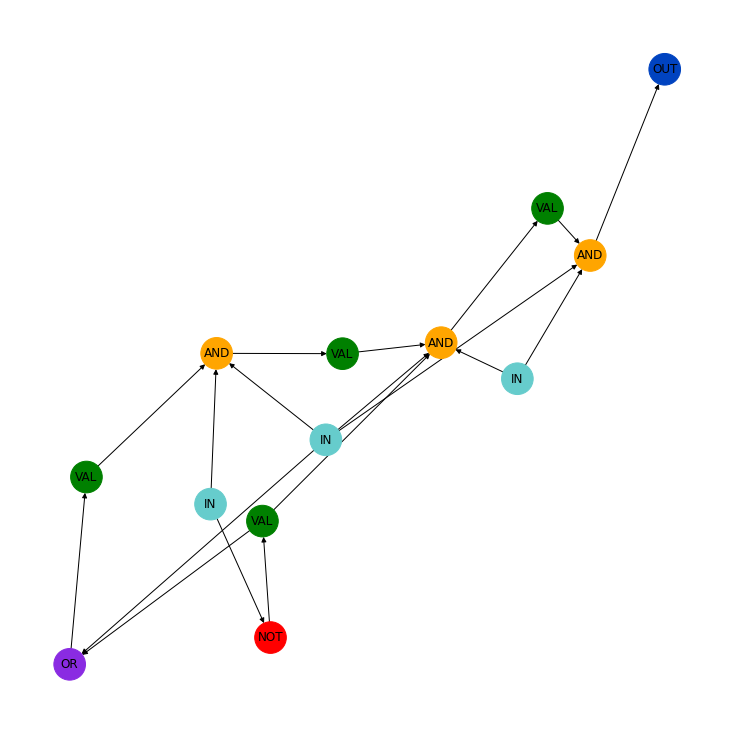

In [366]:
cores= {
    'azulClaro':'#66cccc', 
    'vermelho':'red', 
    'azulEscuro':'#0043c0', 
    'azulNormal':'blue', 
    'laranja':'#FFA500', 
    'roxo':'#8a2be2',
    'verde': 'green'
   }
colors = [cores['azulClaro'] if C.nodes[n]['val'] == 'IN' else
          cores['azulEscuro'] if C.nodes[n]['val'] == 'OUT' else 
          cores['laranja'] if C.nodes[n]['val'] == 'AND' else 
          cores['roxo'] if C.nodes[n]['val'] == 'OR' else
          cores['verde'] if C.nodes[n]['val'] == 'VAL' else
          cores['vermelho'] for n in C.nodes()] 

def desenha(circ):
    if (nx.check_planarity(circ)):
        pos = nx.planar_layout(circ)
    else:
    #se não for planar, usamos uma alternativa
        pos = nx.spring_layout(circ)
    plt.figure(figsize=(10,10))
    nx.draw(circ, with_labels=True, node_size=1000, node_color=colors, labels=nx.get_node_attributes(circ, 'val'))
desenha(C)

In [363]:
def rest(G): 
    m = Model("Circuito Booleano")
    out = m.addVar(vtype='B') 
    y=[]
    inp = []
    inpt = []
    for aresta in G.edges():
        s,t = aresta
        for outras in G.edges():
            a,b = outras
            if (s!=a and s!=b): 
                if G.nodes[a]['val'] == 'IN' and a not in inp: 
                    inp.append(a)
                    if G.nodes[b]['val'] == 'AND': 
                        if t==b and (G.nodes[s]['val']=='VAL' or G.nodes[s]['val'] == 'IN' or G.nodes[s]['val'] == 'OUT'):
                            v =m.addVar(vtype='B')
                            inpt.append(v)
                            k =m.addVar(vtype='B')
                            addAND(m,v,k)
                        if s==b and (G.nodes[t]['val']=='VAL' or G.nodes[t]['val'] == 'IN' or G.nodes[t]['val'] == 'OUT'):
                            v =m.addVar(vtype='B')
                            inpt.append(v)
                            k =m.addVar(vtype='B')
                            addAND(m,v,k)
                    if G.nodes[b]['val'] == 'OR': 
                        if t==b and (G.nodes[s]['val']=='VAL' or G.nodes[s]['val'] == 'IN' or G.nodes[s]['val'] == 'OUT'):
                            v =m.addVar(vtype='B')
                            inpt.append(v)
                            k =m.addVar(vtype='B')
                            addOR(m,v,k)
                        if s==b and (G.nodes[t]['val']=='VAL' or G.nodes[t]['val'] == 'IN' or G.nodes[t]['val'] == 'OUT'):
                            v =m.addVar(vtype='B')
                            inpt.append(v)
                            k =m.addVar(vtype='B')
                            addOR(m,v,k)
                    if G.nodes[b]['val'] == 'NOT': 
                        if t==b and (G.nodes[s]['val']=='VAL' or G.nodes[s]['val'] == 'IN' or G.nodes[s]['val'] == 'OUT'):
                            v =m.addVar(vtype='B')
                            inpt.append(v)
                            k =m.addVar(vtype='B')
                            addNOT(m,v,k)
                        if s==b and (G.nodes[t]['val']=='VAL' or G.nodes[t]['val'] == 'IN' or G.nodes[t]['val'] == 'OUT'):
                            v =m.addVar(vtype='B')
                            inpt.append(v)
                            k =m.addVar(vtype='B')
                            addNOT(m,v,k)
                    
    m.addCons(out == 1)
    m.optimize()
    
    print('out=',m.getVal(out))
    return [round(m.getVal(i)) for i in inpt]                

In [361]:
vet = rest(C)
print("Vetor: " + str(vet))

out= 1.0
Vetor: [1]
